In [5]:
!pip install geopy


In [6]:
!pip install pandas numpy matplotlib seaborn

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import great_circle
from datetime import datetime

print("All packages imported successfully!")

All packages imported successfully!


In [16]:
import pandas as pd
import numpy as np
import os

def load_uber_data(file_path):
    """
    Load and clean Uber fares data from specified file path
    Returns cleaned DataFrame or None if loading fails
    """
    try:
        # Try different file formats and delimiters
        try:
            # First attempt: Standard CSV
            df = pd.read_csv(file_path)
            print("✅ Data loaded as standard CSV")
            
            # Clean common unnecessary columns
            df = df.drop(['Unnamed: 0', 'key'], axis=1, errors='ignore')
            
        except pd.errors.ParserError:
            # Second attempt: Pipe-delimited
            df = pd.read_csv(file_path, sep='|', skiprows=2, header=None)
            df.columns = ['trip_id', 'fare_amount', 'pickup_datetime',
                         'pickup_longitude', 'pickup_latitude',
                         'dropoff_longitude', 'dropoff_latitude']
            print("✅ Data loaded as pipe-delimited file")
            
        # Data type conversions
        df['fare_amount'] = pd.to_numeric(df['fare_amount'], errors='coerce')
        df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
        
        # Coordinate columns conversion
        coord_cols = ['pickup_longitude', 'pickup_latitude', 
                     'dropoff_longitude', 'dropoff_latitude']
        df[coord_cols] = df[coord_cols].apply(pd.to_numeric, errors='coerce')
        
        # Data validation
        initial_count = len(df)
        
        # NYC bounding box coordinates
        nyc_bounds = {
            'min_lat': 40.5, 'max_lat': 40.9,
            'min_lon': -74.3, 'max_lon': -73.7
        }
        
        # Filter valid data points
        df = df.dropna(subset=['fare_amount', 'pickup_datetime'] + coord_cols)
        df = df[
            (df['pickup_latitude'].between(nyc_bounds['min_lat'], nyc_bounds['max_lat'])) &
            (df['pickup_longitude'].between(nyc_bounds['min_lon'], nyc_bounds['max_lon'])) &
            (df['dropoff_latitude'].between(nyc_bounds['min_lat'], nyc_bounds['max_lat'])) &
            (df['dropoff_longitude'].between(nyc_bounds['min_lon'], nyc_bounds['max_lon']))
        ]
        
        print(f"✅ Data cleaned! Kept {len(df)}/{initial_count} valid records")
        return df
        
    except Exception as e:
        print(f"❌ Error loading data: {str(e)}")
        print(f"Please verify the file exists at: {file_path}")
        print("Files in directory:", os.listdir(os.path.dirname(file_path)))
        return None

# Example usage:
file_path = r"C:\Users\pacif\Downloads\Compressed\archive\uber.csv"  # Update with your actual path
uber_df = load_uber_data(file_path)

if uber_df is not None:
    print("\nFirst 5 rows of cleaned data:")
    print(uber_df.head())
    
    # Optional: Add time-based features
    uber_df['hour'] = uber_df['pickup_datetime'].dt.hour
    uber_df['day_of_week'] = uber_df['pickup_datetime'].dt.day_name()
    uber_df['peak_hour'] = uber_df['hour'].apply(
        lambda x: 'Peak' if (7 <= x <= 9) or (17 <= x <= 19) else 'Off-Peak'
    )
    
    print("\nColumns after processing:")
    print(uber_df.columns.tolist())

✅ Data loaded as standard CSV
✅ Data cleaned! Kept 195489/200000 valid records

First 5 rows of cleaned data:
   fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5 2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1          7.7 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2         12.9 2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3          5.3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4         16.0 2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5  

Columns after processing:
['fare_amount', 'pickup_datetime', 'pick

In [13]:
import os

# Check current working directory and files
print("Current directory:", os.getcwd())
print("Files in directory:", os.listdir())

Current directory: c:\Users\pacif\Downloads
Files in directory: ['1.jpg', '11zon_cropped.png', '1_TWE0U1AvPFcSF5yVg5L7K84aScOhqrT2DXbQ1F8sGk.pptx', '2.jpg', '26983 (1).pdf', '26983 (2).pdf', '26983 (3).pdf', '26983.pdf', '3.jpg', '4.jpg', '4.webp', 'amoria-connect.zip', 'amoria-site (1).zip', 'amoria-site (2).zip', 'amoria-site.zip', 'amoria_blog (1).zip', 'amoria_blog.zip', 'Amoria_Global_Tech-210.pdf', 'BingWallpaper.jpg', 'Chap 1 Introduction to Software Security.pptx', 'Chap 2 Web application Security (1).pptx', 'Chap 2 Web application Security.pptx', 'Compressed', 'desktop.ini', 'Documents', 'download.jpg', 'DVWA-1.0.7.iso', 'DVWA_Assignment_Final_Report_Uwitonze_Pacific.docx', 'Git-2.49.0-64-bit.exe', 'homewifi.jpg', 'HouseSpot_Survey_Form.docx', 'IDM.Trial.Reset.v1.0.0', 'IDM.Trial.Reset.v1.0.0.zip', 'idman642build40.exe', 'Iphone 13 pro.jpg', 'kali-linux-2025.2-installer-amd64 (1).iso', 'kali-linux-2025.2-installer-amd64.iso', 'kali-linux-2025.2-virtualbox-amd64.7z', 'Lecture 3

In [15]:
import pandas as pd
import numpy as np
import os

# 1. Set the correct file path
file_path = r"C:\Users\pacif\Downloads\Compressed\archive\uber.csv"  # Update if your filename is different

# 2. Load the data with error handling
try:
    # First try standard CSV loading
    df = pd.read_csv(file_path)
    
    # If column names need adjustment (check output)
    if 'Unnamed: 0' in df.columns:
        df = df.drop(['Unnamed: 0', 'key'], axis=1, errors='ignore')
        
except Exception as e:
    print(f"Error loading CSV: {e}")
    print("Trying alternative formats...")
    
    try:
        # Try pipe-delimited format if CSV fails
        df = pd.read_csv(file_path, sep='|', skiprows=2, header=None)
        df.columns = ['trip_id', 'fare_amount', 'pickup_datetime',
                     'pickup_longitude', 'pickup_latitude',
                     'dropoff_longitude', 'dropoff_latitude']
    except Exception as e:
        print(f"Failed to load file: {e}")
        print("Please verify:")
        print(f"- File exists at: {file_path}")
        print("- Correct file permissions")
        raise

# 3. Data Cleaning
# Convert data types
df['fare_amount'] = pd.to_numeric(df['fare_amount'], errors='coerce')
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# Convert coordinates
coord_cols = ['pickup_longitude', 'pickup_latitude', 
              'dropoff_longitude', 'dropoff_latitude']
df[coord_cols] = df[coord_cols].apply(pd.to_numeric, errors='coerce')

# 4. Validate NYC coordinates
nyc_bounds = {
    'min_lat': 40.5, 'max_lat': 40.9,
    'min_lon': -74.3, 'max_lon': -73.7
}

initial_count = len(df)
df = df.dropna(subset=['fare_amount', 'pickup_datetime'] + coord_cols)
df = df[
    (df['pickup_latitude'].between(nyc_bounds['min_lat'], nyc_bounds['max_lat'])) &
    (df['pickup_longitude'].between(nyc_bounds['min_lon'], nyc_bounds['max_lon'])) &
    (df['dropoff_latitude'].between(nyc_bounds['min_lat'], nyc_bounds['max_lat'])) &
    (df['dropoff_longitude'].between(nyc_bounds['min_lon'], nyc_bounds['max_lon']))
]

print(f"\n✅ Data loaded successfully! Kept {len(df)}/{initial_count} valid records")
print("\nData Sample:")
print(df.head())

# 5. Feature Engineering (optional - add if needed)
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.day_name()
df['peak_hour'] = df['hour'].apply(lambda x: 'Peak' if (7 <= x <= 9) or (17 <= x <= 19) else 'Off-Peak')

print("\nColumns after processing:")
print(df.columns.tolist())


✅ Data loaded successfully! Kept 195489/200000 valid records

Data Sample:
   fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5 2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1          7.7 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2         12.9 2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3          5.3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4         16.0 2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5  

Columns after processing:
['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 

In [22]:
import pandas as pd
import numpy as np

# 1. FIRST LOAD YOUR DATA (replace with your actual loading code)
try:
    # Example loading code - REPLACE THIS WITH YOUR ACTUAL DATA LOADING CODE
    df = pd.read_csv(r"C:\Users\pacif\Downloads\Compressed\archive\uber.csv")
    print("✅ Data loaded successfully!")
    
    # Clean the data if needed (add your cleaning steps here)
    df = df.drop(['Unnamed: 0', 'key'], axis=1, errors='ignore')
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    
except Exception as e:
    print(f"❌ Failed to load data: {e}")
    exit()

# 2. NOW ADD FEATURES TO THE LOADED DATAFRAME
def add_uber_features(df):
    """Add time and distance features to Uber data"""
    try:
        # Time features
        df['hour'] = df['pickup_datetime'].dt.hour
        df['day_of_week'] = df['pickup_datetime'].dt.dayofweek  # Monday=0
        df['day_name'] = df['pickup_datetime'].dt.day_name()    # As text
        df['month'] = df['pickup_datetime'].dt.month
        
        # Peak hours (7-9am, 4-7pm)
        df['peak_hour'] = np.where(
            ((df['hour'].between(7,9)) | (df['hour'].between(16,19))),
            1,  # Peak
            0   # Off-peak
        )
        
        # Calculate distance if not already present
        if 'distance_km' not in df.columns:
            from math import radians, sin, cos, sqrt, atan2
            def haversine(row):
                lat1, lon1 = radians(row['pickup_latitude']), radians(row['pickup_longitude'])
                lat2, lon2 = radians(row['dropoff_latitude']), radians(row['dropoff_longitude'])
                dlat = lat2 - lat1
                dlon = lon2 - lon1
                a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
                return 6371 * 2 * atan2(sqrt(a), sqrt(1-a))  # Earth's radius in km
            
            df['distance_km'] = df.apply(haversine, axis=1)
        
        # Fare per km (handle division by zero)
        df['fare_per_km'] = df['fare_amount'] / df['distance_km'].replace(0, np.nan)
        
        return df
        
    except Exception as e:
        print(f"❌ Feature engineering failed: {e}")
        return None

# 3. APPLY TO YOUR DATA
uber_enhanced = add_uber_features(df)

if uber_enhanced is not None:
    # 4. SAVE THE RESULTS
    try:
        uber_enhanced.to_csv("final_uber_analysis.csv", index=False)
        print("✅ Final dataset with features saved!")
        print("\nSample of new features:")
        print(uber_enhanced[['hour', 'day_name', 'peak_hour', 'distance_km', 'fare_per_km']].head())
    except Exception as e:
        print(f"❌ Failed to save file: {e}")

✅ Data loaded successfully!
✅ Final dataset with features saved!

Sample of new features:
   hour  day_name  peak_hour  distance_km  fare_per_km
0    19  Thursday          1     1.683323     4.455474
1    20    Friday          0     2.457590     3.133151
2    21    Monday          0     5.036377     2.561365
3     8    Friday          1     1.661683     3.189536
4    17  Thursday          1     4.475450     3.575060


✅ Data loaded successfully!
Total records: 200000


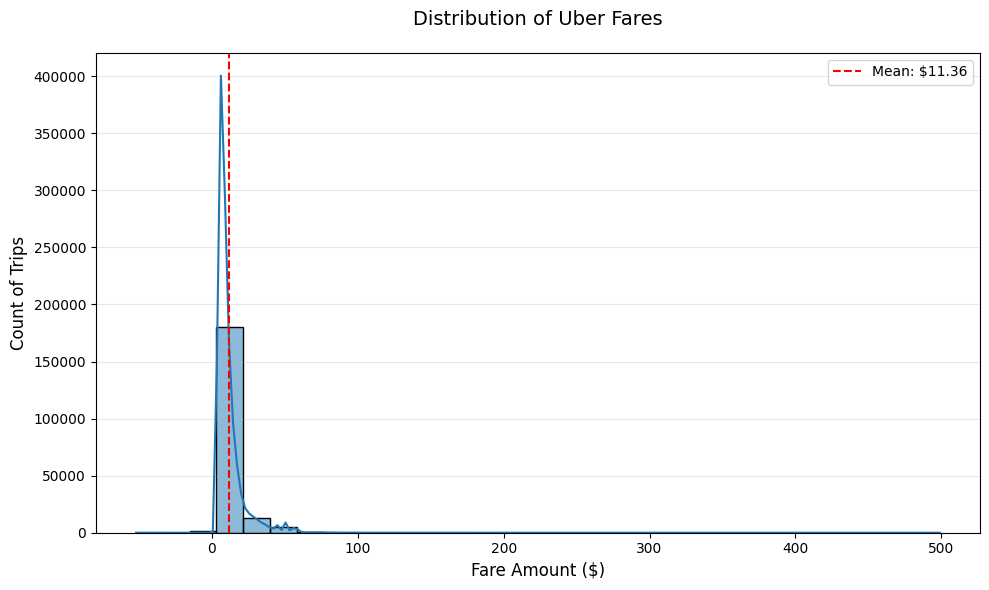

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. First load your data (replace with your actual data loading code)
try:
    # Example - replace with your actual file path
    uber = pd.read_csv("final_uber_analysis.csv")  
    
    # Ensure fare_amount exists and is numeric
    uber['fare_amount'] = pd.to_numeric(uber['fare_amount'])
    
    print("✅ Data loaded successfully!")
    print(f"Total records: {len(uber)}")
    
except Exception as e:
    print(f"❌ Error loading data: {e}")
    exit()

# 2. Now create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=uber, x='fare_amount', bins=30, kde=True)

# Customize the plot
plt.title("Distribution of Uber Fares", fontsize=14, pad=20)
plt.xlabel("Fare Amount ($)", fontsize=12)
plt.ylabel("Count of Trips", fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add vertical line at mean
mean_fare = uber['fare_amount'].mean()
plt.axvline(mean_fare, color='red', linestyle='--', 
            label=f'Mean: ${mean_fare:.2f}')

plt.legend()
plt.tight_layout()
plt.show()

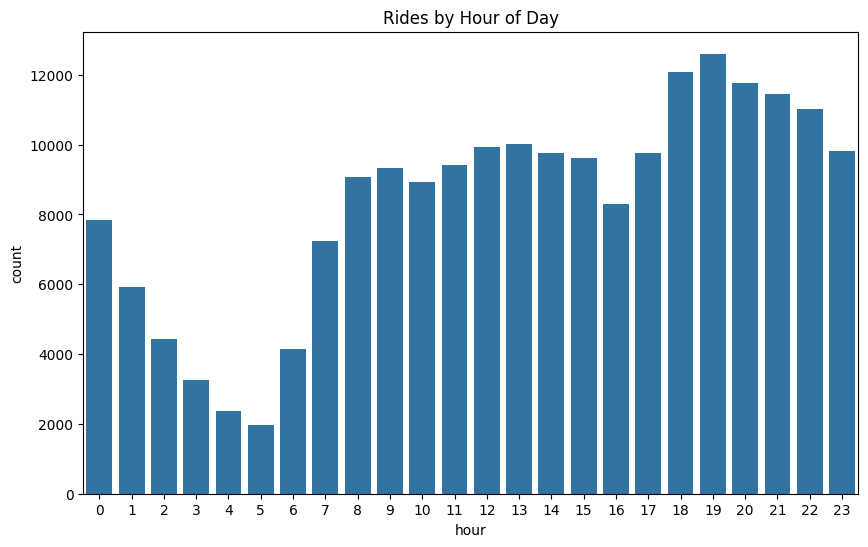

In [2]:
# Rides by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=uber)
plt.title("Rides by Hour of Day")
plt.show()

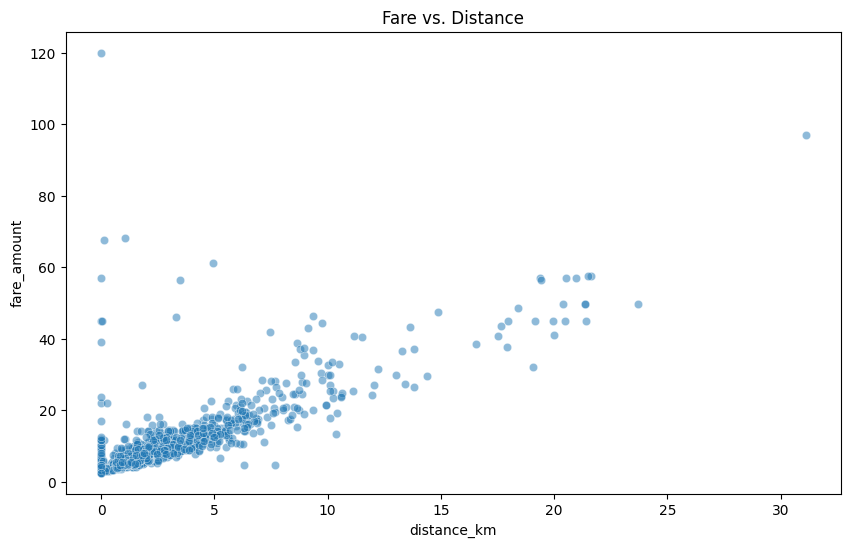

In [3]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_km', y='fare_amount', data=uber.sample(1000), alpha=0.5)
plt.title("Fare vs. Distance")
plt.show()

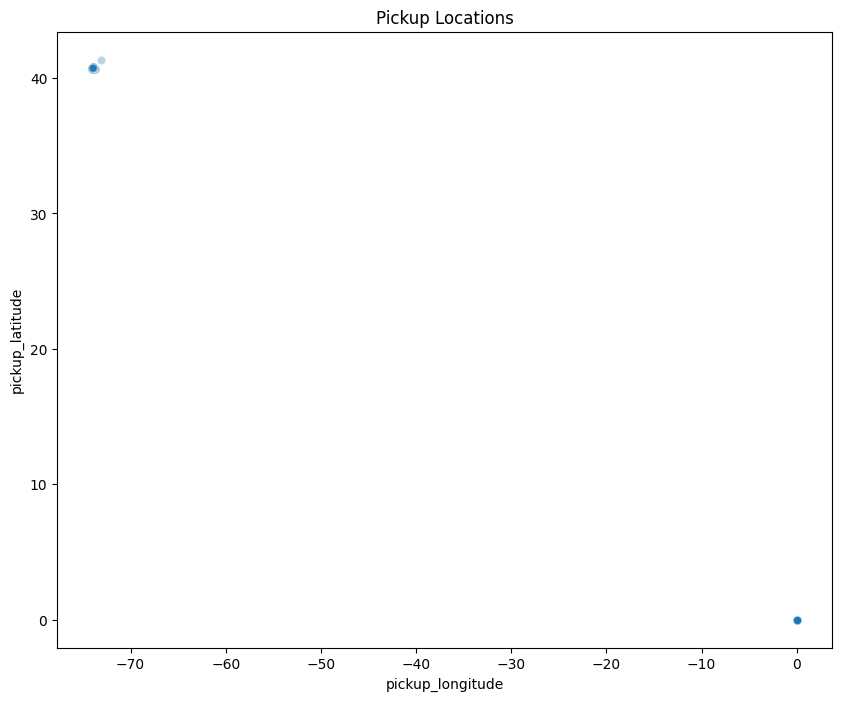

In [4]:
# Plot pickup locations (sample 1,000 points for speed)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', 
                data=uber.sample(1000), alpha=0.3)
plt.title("Pickup Locations")
plt.show()

In [8]:
# Generate extended stats with median & mode for all
features = ['fare_amount', 'distance_km', 'passenger_count']
stats = uber[features].describe().T
stats['median'] = uber[features].median()
stats['mode'] = uber[features].mode().iloc[0]
stats['std'] = uber[features].std()

# Preview nicely
print("Summary Statistics:")
display(stats[['mean', 'median', 'mode', 'std', 'min', '25%', '50%', '75%', 'max']])


Summary Statistics:


,mean,median,mode,std,min,25%,50%,75%,max
fare_amount,11.359955,8.500000,6.5,9.901776,-52.0,6.000000,8.500000,12.500000,499.000000
distance_km,20.855350,2.120992,0.0,382.964642,0.0,1.215222,2.120992,3.875169,16409.239135
passenger_count,1.684535,1.000000,1.0,1.385997,0.0,1.000000,1.000000,2.000000,208.000000


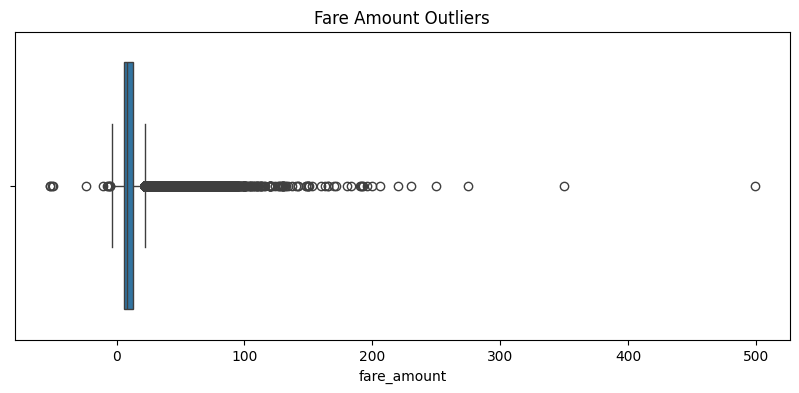

In [6]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=uber['fare_amount'])
plt.title("Fare Amount Outliers")
plt.savefig('fare_outliers.png')  # Save for report
plt.show()

In [9]:
q1 = uber['fare_amount'].quantile(0.25)
q3 = uber['fare_amount'].quantile(0.75)
iqr = q3 - q1
outliers = uber[(uber['fare_amount'] < q1 - 1.5 * iqr) | (uber['fare_amount'] > q3 + 1.5 * iqr)]
print(f"Outliers detected: {len(outliers)}")


Outliers detected: 17167


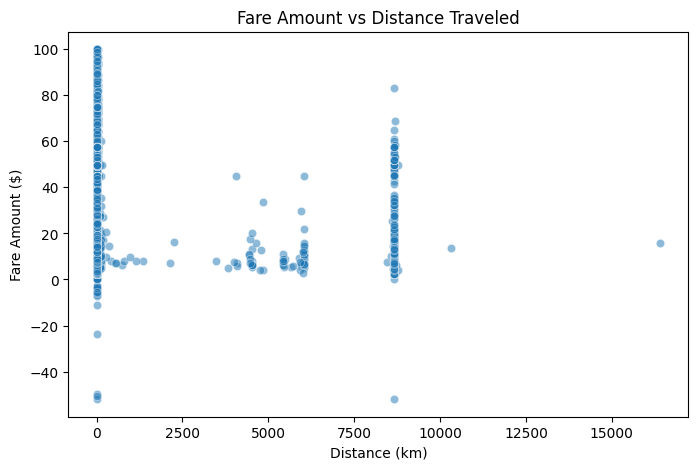

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=uber, x='distance_km', y='fare_amount', alpha=0.5)
plt.title("Fare Amount vs Distance Traveled")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.savefig("fare_vs_distance.png")  # Save for report
plt.show()


In [13]:
correlation = uber[['fare_amount', 'distance_km']].corr().iloc[0,1]
print(f"✅ Correlation between fare and distance: {correlation:.4f}")


✅ Correlation between fare and distance: 0.0260


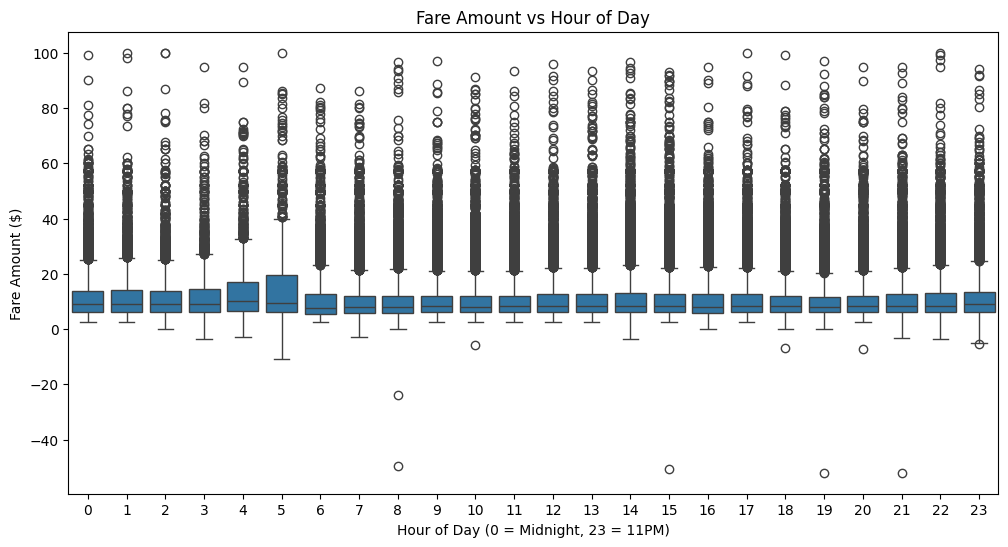

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=uber, x='hour', y='fare_amount')
plt.title("Fare Amount vs Hour of Day")
plt.xlabel("Hour of Day (0 = Midnight, 23 = 11PM)")
plt.ylabel("Fare Amount ($)")
plt.savefig("fare_vs_hour.png")  # For report
plt.show()


In [15]:
quantiles = uber[['fare_amount', 'distance_km']].quantile([0.1, 0.25, 0.5, 0.75, 0.9])
print("Quantiles:\n", quantiles)

Quantiles:
       fare_amount  distance_km
0.10          4.5     0.724706
0.25          6.0     1.215433
0.50          8.5     2.120856
0.75         12.5     3.874160
0.90         20.3     7.016504


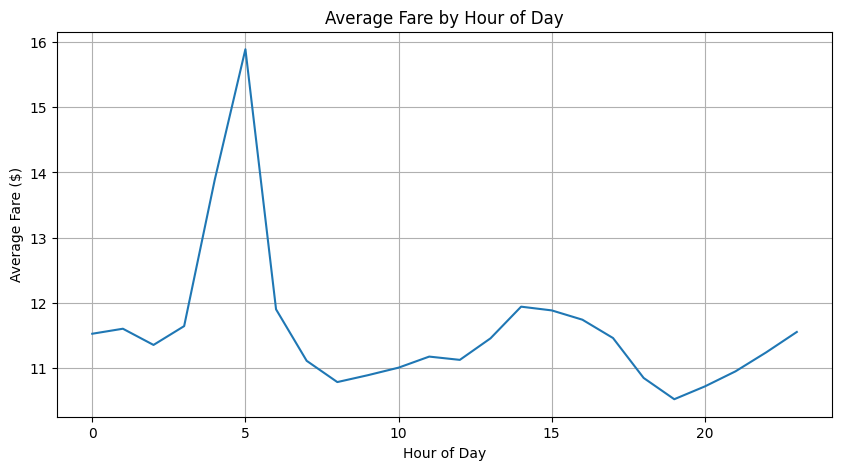

In [16]:
# Compute average fare by hour
hourly_avg = uber.groupby('hour')['fare_amount'].mean()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values)
plt.title("Average Fare by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare ($)")
plt.grid(True)
plt.savefig("avg_fare_per_hour.png")
plt.show()


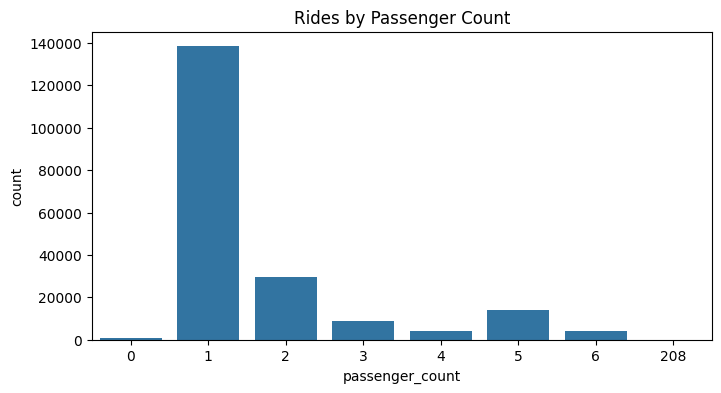

passenger_count
0       9.459944
1      11.190601
2      11.735971
3      11.424010
4      11.614241
5      11.186962
6      12.125593
208    11.700000
Name: fare_amount, dtype: float64


In [17]:
plt.figure(figsize=(8, 4))
sns.countplot(x='passenger_count', data=uber)
plt.title("Rides by Passenger Count")
plt.show()

# Avg fare by passenger count
print(uber.groupby('passenger_count')['fare_amount'].mean())

In [ ]:

corr_hour = uber[['fare_amount', 'hour']].corr().iloc[0, 1]
print(f"Correlation between fare amount and hour: {corr_hour:.4f}")


Correlation between fare amount and hour: -0.0209
